In [1]:
using Pkg
Pkg.activate(".")
using Vizagrams
using Librsvg_jll

  Activating project at `~/Documents/GitHub/CTViz_Workshop/Presentation/notebooks`


In [2]:
function savepdf(
    plt::Union{Mark,𝕋{Mark}}; filename::String, directory::String="./", width=335, pad=1
)
    extension = filename[(end - 2):end]
    img = string(drawsvg(plt; width=width, height=nothing,pad=pad))
    fname = filename
    dirpath = directory
    fpath = joinpath(dirpath, fname)

    if extension == "pdf"
        return mktemp() do path, io
            write(io, img)
            close(io)
            run(`$(rsvg_convert()) $path -f $extension -o $fpath`)
        end
    end

    return mktemp() do path, io
        write(io, img)
        close(io)
        run(`$(rsvg_convert()) $path -f $extension -o $fpath`)
    end
end


savepdf (generic function with 1 method)

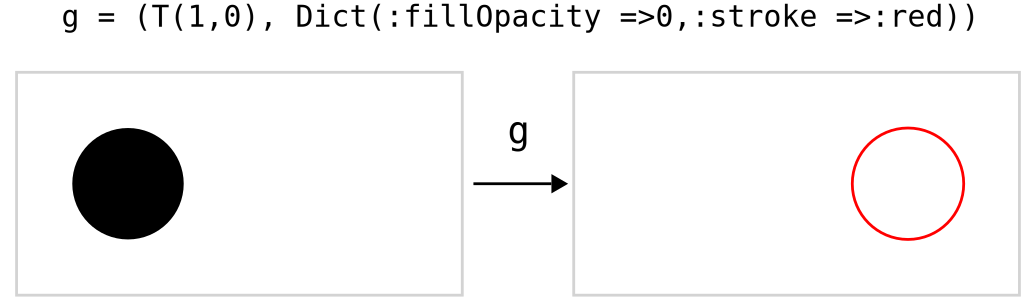

In [3]:
circle = Circle(r=0.5)
frame = T(-2,-1)Frame(size=(4,2))
d₁ = T(-1,0)circle + frame

g  = T(1,0)*R(-π/4)
d₂ = g * (S(:fill=>:white, :stroke=>:red)*circle) + frame
a  = T(2.1,0) *(Arrow(pts=[[0,0],[0.7,0]])↑(T(0.40,0.2),TextMark(anchor=:c,text="g",fontfamily="monospace",fontsize=0.25)))
d = (d₁ → (T(1,0),d₂)) + a
equation = TextMark(text="g = (T(1,0), Dict(:fillOpacity =>0,:stroke =>:red))",fontsize=0.20,fontfamily="monospace")
equation = acenter(d,equation)*equation
d = d ↑ (T(0,0.35),equation)
d = U(40)centralize_graphic(d)
savepdf(d,filename="primitivetransformation.pdf");
drawsvg(d)

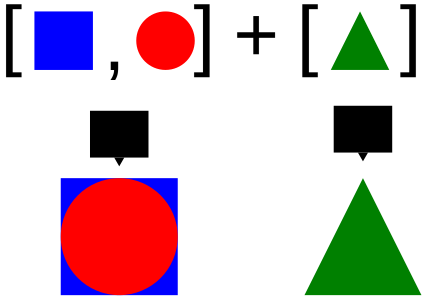

In [4]:
s = (7,4)
frame = T(-s[1]/2,-s[2]/2)Frame(size=s)
p1 = Prim(Square(l=2),S(:fill=>:blue))
p2 = Prim(Circle(),S(:fill=>:red))
listp = T(-1,1)U(0.5)*(TextMark(text="[",fontsize=2) + T(1.7,-0.3)*
    (
        p1 →
        (T(0,0),
            TextMark(text=" , ", fontsize=2) →
            p2
            )) → TextMark(text="]",fontsize=2)
)
# d = aright(frame,d) * d + frame

ps = T(0.8,-2.5)*(p1 +p2)
# d = T(0.5,0)*atop(frame,d)[1] * aleft(frame,d)[1] * d + ps
a = Arrow(pts=[[0.8,0],[0.8,-0.8]])
dp1p2 = (listp ↓ (T(0,-0.5),a)) + ps


p3 = Prim(Polygon([[-1.0,-1.0],[0,1.0],[1.0,-1.0]]),S(:fill=>:green))
listp = T(-1,1)U(0.5)*(TextMark(text="[",fontsize=2) + T(1.7,-0.3)*
    p3 → TextMark(text=" ]",fontsize=2)
)
# d = aright(frame,d) * d + frame

ps = T(-0.1,-2.5)*(p3)
# d = T(0.5,0)*atop(frame,d)[1] * aleft(frame,d)[1] * d + ps
a = Arrow(pts=[[-0.1,0],[-0.1,-0.8]])
dp3 = (listp ↓ (T(0,-0.5),a)) + ps

ds = dp1p2 → (T(1,1),TextMark(text=" + ",fontfamily="Courier New",fontsize=1)) → (T(1,0),dp3)
draw(ds)

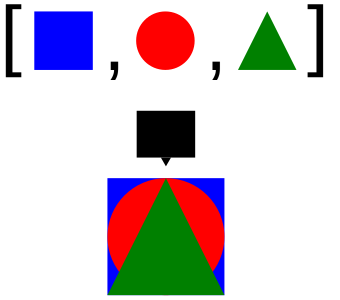

In [5]:
# frame = Translation(-2,-2)*(S(:stroke=>:white)▷ζ(Frame(size=(7,4))))
s = (7,4)
frame = T(-s[1]/2,-s[2]/2)Frame(size=s)
p1 = Prim(Square(l=2),S(:fill=>:blue))
p2 = Prim(Circle(),S(:fill=>:red))
p3 = Prim(Polygon([[-1.0,-1.0],[0,1.0],[1.0,-1.0]]),S(:fill=>:green))
listp = T(-1,1)U(0.5)*(TextMark(text="[ ",fontsize=2) + T(1.7,-0.3)*
    (
        p1 →
        (T(0,0),
            TextMark(text=" , ", fontsize=2) →
            p2
            ) →
        (T(0,0),
            TextMark(text=" , ", fontsize=2) →
            p3
            ) 
        ) → TextMark(text=" ]",fontsize=2)
)
# d = aright(frame,d) * d + frame

ps = T(1.6,-2.5)*(p1 +p2 + p3)
# d = T(0.5,0)*atop(frame,d)[1] * aleft(frame,d)[1] * d + ps
a = Arrow(pts=[[1.6,0],[1.6,-0.8]])
d1 = (listp ↓ (T(0,-0.5),a)) + ps


drawsvg(d1)

In [6]:
d = ds → (T(2,0),T(0,1)TextMark(text="=",fontfamily="Courier New",fontsize=1) → (T(2,0),d1));

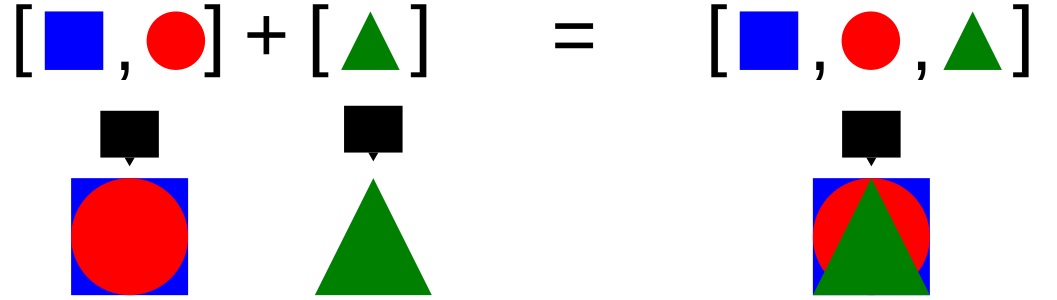

In [7]:
draw(d)

In [8]:
savefig(U(40)d,filename="simplediagram.pdf");

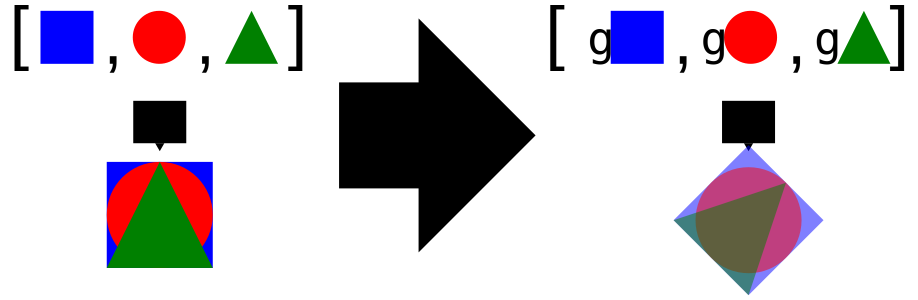

In [11]:
seta = Polygon([
            [-0.5,-1.0],
            [-0.5,0.5],
            [-1,0.5],
            [0,1.5],
            [1,0.5],
            [0.5,0.5],
            [0.5,-1.0],
            ])
textg = TextMark(text="g",fontfamily="monospace",fontsize=1.3)

listp = T(-1,1)U(0.5)*(TextMark(text="[",fontsize=2) + T(3,-0.3)*
    (
        (p1←textg)→
        (T(0,0),
            TextMark(text=" , ", fontsize=2) →
        (p2←textg)
            ) →
        (T(0,0),
            TextMark(text=" , ", fontsize=2) →
        (p3←textg)
            ) 
        ) → TextMark(text="]",fontsize=2)
)
# d = aright(frame,d) * d + frame

transf = R(-π/4)S(:opacity=>0.5)
ps = T(2.6,-2.6)*transf*(p1 +p2 + p3)
# d = T(0.5,0)*atop(frame,d)[1] * aleft(frame,d)[1] * d + ps
a = Arrow(pts=[[2.6,0],[2.6,-0.8]])
d2 = (listp ↓ (T(0,-0.5),a)) + ps

setag = T(0,0.1)U(0.4)S(:fill=>:grey)textg + R(-π/2)S(:fill=>:white,:stroke=>:black,:fillOpacity=>0)seta
d  = (d1 → (T(1.0,-1),setag)) → (T(1,0),d2)

drawsvg(d)

In [12]:
savefig(U(40)d,filename="diagramtransformation.pdf");